# Poisson process

In [1]:
import numpy as np
np.set_printoptions(precision = 4, suppress = True)
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
X = np.random.exponential(scale = 2, size=10)
X = np.insert(X , 0, 0)
print(X)

[0.     5.0168 0.9581 1.3107 0.1181 2.2917 9.4531 3.5636 0.9547 0.9819
 0.969 ]


In [7]:
T = np.cumsum(X)
print(T)
N = np.array(range(T.size))
print(N)

[ 0.      5.0168  5.9749  7.2856  7.4037  9.6954 19.1485 22.7121 23.6669
 24.6488 25.6178]
[ 0  1  2  3  4  5  6  7  8  9 10]


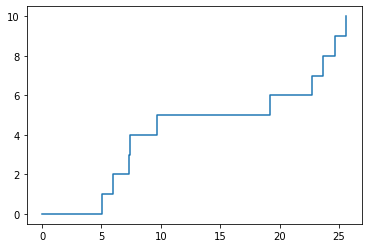

In [8]:
plt.step(T, N, where='post')
plt.show()

## Trajektorie pomocí cyklu

In [9]:
# Parametry
Tmax = 10
lamb = 2
# Geneorovani
T = []
Tlast = 0
beta = 1/lamb
while Tlast < Tmax:
    T = np.append(T,Tlast)
    X = np.random.exponential(scale = beta)
    Tlast = Tlast + X

N = np.array(range(T.size))
T = np.append(T,Tmax)
N = np.append(N,N[-1])
# print(T)
# print(N)
print(np.transpose(np.matrix(np.reshape(np.append(N,T),(2,-1)))))

[[ 0.      0.    ]
 [ 1.      0.3734]
 [ 2.      0.5484]
 [ 3.      0.7997]
 [ 4.      1.3643]
 [ 5.      1.9753]
 [ 6.      2.2046]
 [ 7.      2.6338]
 [ 8.      2.9016]
 [ 9.      3.1764]
 [10.      3.4519]
 [11.      3.5413]
 [12.      3.9475]
 [13.      4.293 ]
 [14.      4.9395]
 [15.      6.094 ]
 [16.      6.7402]
 [17.      6.7609]
 [18.      7.8087]
 [19.      8.1267]
 [20.      8.6956]
 [21.      9.3155]
 [22.      9.4478]
 [23.      9.4787]
 [23.     10.    ]]


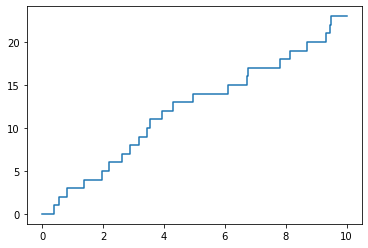

In [10]:
plt.step(T, N, where='post')
plt.show()

## Poisson pomocí Unif příchodů

In [17]:
# Parametry
lamb = 2
Tmax = 10
# Vypocet
n = np.random.poisson(lamb*Tmax)
print(n)
U = np.random.uniform(low=0, high=Tmax, size=n)
# print(U)
T = np.sort(U)
T = np.append([0],T)
N = np.array(range(n+1))
T = np.append(T,Tmax)
N = np.append(N,N[-1])
# print(T)
# print(N)
print(np.transpose(np.matrix(np.reshape(np.append(N,T),(2,-1)))))

19
[[ 0.      0.    ]
 [ 1.      0.7423]
 [ 2.      1.9481]
 [ 3.      2.0714]
 [ 4.      3.1746]
 [ 5.      3.5977]
 [ 6.      3.7075]
 [ 7.      4.065 ]
 [ 8.      4.2142]
 [ 9.      4.3488]
 [10.      4.3915]
 [11.      4.9876]
 [12.      5.0293]
 [13.      5.0357]
 [14.      5.1339]
 [15.      5.8022]
 [16.      6.4034]
 [17.      6.936 ]
 [18.      7.5769]
 [19.      9.6407]
 [19.     10.    ]]


In [13]:
print(n)
print(U)

13
[2.2346 6.2384 0.6902 7.7686 8.3419 2.7763 3.8598 8.5367 0.3552 9.4897
 1.3639 0.8813 2.4929]


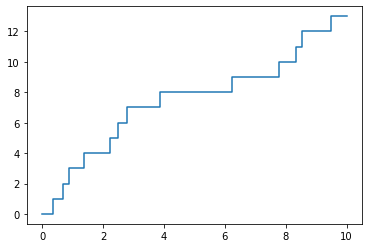

In [14]:
plt.step(T, N, where='post')
plt.show()

# Simulace řetězce s diskrétním časem

In [18]:
# Matice prechodu
D = [[1/3,1/3,1/3],[1/2,1/2,0],[0,1,0]]
# pocet kroku je n
# n = 10
# print(np.matrix(D))
# pocatecni rozdeleni
p0 = [0,1,0]
# pocatecni stav
v = np.random.multinomial(1, p0 , size=1)
s0 = np.where(v == 1)[1]
Y = np.zeros(n+1)
Y[0] = s0
sk = s0
for k in range(1,n+1):
    v = np.random.multinomial(1, D[sk[0]] , size=1)
    sk = np.where(v == 1)[1]
    Y[k] = sk

print(Y)

[1. 0. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0. 0. 0. 1. 1. 0. 0. 2. 1.]


# Časování Poissonem

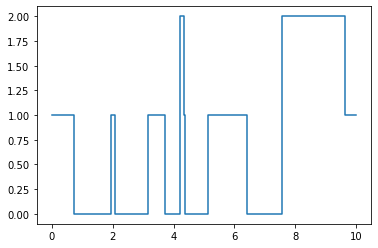

In [19]:
plt.step(T, np.append(Y,Y[-1]), where='post')
plt.show()